In [1]:
from itertools import product
import numpy as np
from matplotlib import pyplot as plt
from plot_utils import *
import porepy as pp

/home/porepy/porepy/src/porepy/numerics/nonlinear/nonlinear_solvers.py:14: TqdmExperimentalWarning: Using `tqdm.autonotebook.tqdm` in notebook mode. Use `tqdm.tqdm` instead to force console mode (e.g. in jupyter console)
  from tqdm.autonotebook import trange  # type: ignore


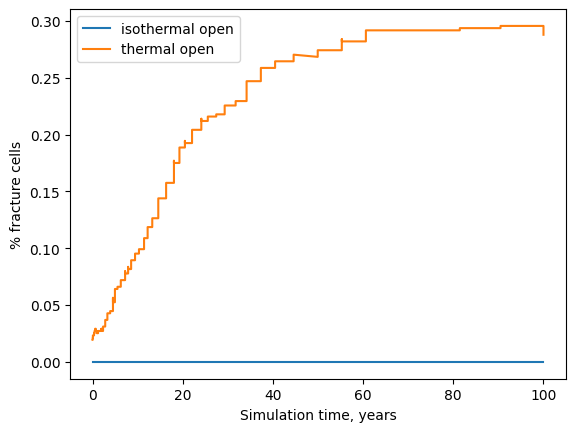

In [2]:
g = 1
data = {
    # 'SAMG isothermal': load_data(f"../stats/stats_thermal_geo5x{g}_sol{'SAMG'}_isothermal.json"),
    # 'SAMG thermal': load_data(f"../stats/stats_thermal_geo5x{g}_sol{'SAMG'}.json"),
    'isothermal': load_data(f"../stats/stats_thermal_geo5x{g}_sol{'CPR'}_isothermal.json"),
    'thermal': load_data(f"../stats/stats_thermal_geo5x{g}_sol{'CPR'}.json"),
}

DAY = 24 * 60 * 60
YEAR = DAY * 365


for name, d in data.items():
    ts = np.cumsum(get_time_steps(d))
    ls = get_ls_indices(d)
    st, sl, op = get_num_sticking_sliding_open(d)
    total_frac = st + sl + op
    # plt.plot(ts[ls] / YEAR, sl / total_frac, label=name + ' sliding')
    plt.plot(ts[ls] / YEAR, op / total_frac, label=name + ' open')


plt.ylabel('% fracture cells')
plt.xlabel('Simulation time, years')
plt.legend()

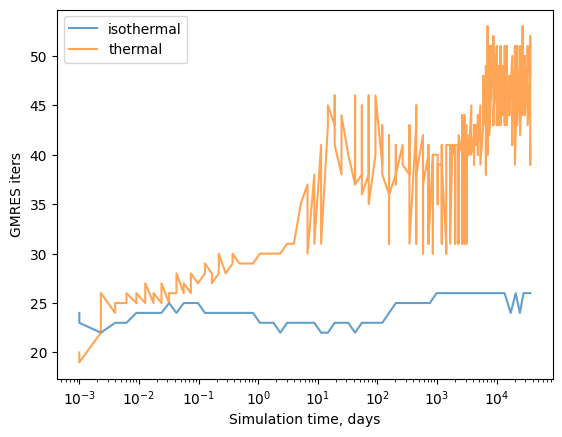

In [3]:
for name, d in data.items():
    ts = np.cumsum(get_time_steps(d))
    ls = get_ls_indices(d)
    st, sl, op = get_num_sticking_sliding_open(d)
    total_frac = st + sl + op
    plt.plot(ts[ls] / DAY, get_gmres_iterations(d), label=name, alpha=0.7)
    
plt.xscale('log')
plt.ylabel('GMRES iters')
plt.xlabel('Simulation time, days')
plt.legend()

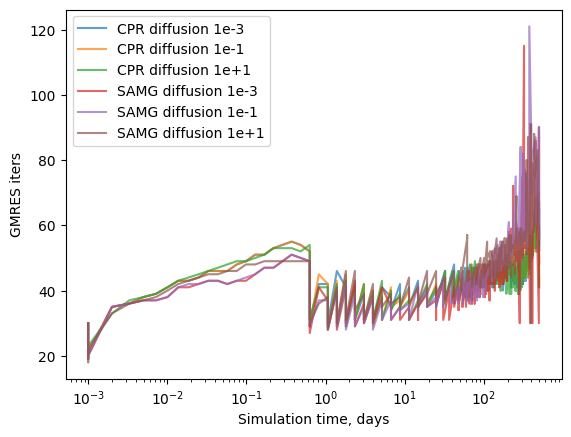

In [4]:
g = 25
s = 'CPR'

data = {
    'CPR diffusion 1e-3': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'CPR'}_diffusion={0.01}.json"),
    'CPR diffusion 1e-1': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'CPR'}.json"),
    'CPR diffusion 1e+1': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'CPR'}_diffusion={100}.json"),
    'SAMG diffusion 1e-3': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'SAMG'}_diffusion={0.01}.json"),
    'SAMG diffusion 1e-1': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'SAMG'}.json"),
    'SAMG diffusion 1e+1': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'SAMG'}_diffusion={100}.json"),
}

DAY = 24 * 60 * 60


for name, d in data.items():
    ts = np.cumsum(get_time_steps(d))
    ls = get_ls_indices(d)
    
    # st, sl, op = get_num_sticking_sliding_open(d)
    # total_frac = st + sl + op
    # plt.plot(ts[ls] / DAY, sl / total_frac, label=name, alpha=0.6)
    # plt.ylabel('Share of sliding cells')
    
    # plt.plot(get_gmres_iterations(d), label=name, alpha=0.7)
    plt.ylabel('GMRES iters')
    plt.plot(ts[ls] / DAY, get_gmres_iterations(d), label=name, alpha=0.7)
    plt.xscale('log')

    # fourier = get_fourier_max(d)
    # plt.plot(ts[ls] / DAY, fourier, label=name, alpha=0.7)
    # plt.yscale('log')

    # enthalpy = get_enthalpy_max(d)
    # plt.plot(ts[ls] / DAY, enthalpy, label='Convection', alpha=0.7)
    # plt.yscale('log')
    # plt.ylim(bottom=1e-5, top=1e-2)


plt.xlabel('Simulation time, days')
plt.legend()

In [5]:
import pandas as pd
from collections import defaultdict

table = defaultdict(dict)
NDIGITS = 1

for name, d in data.items():
    solver, _, diffusion = name.split(' ')
    conv = np.array(get_enthalpy_max(d))
    diff = np.array(get_fourier_max(d))
    table[diffusion]['Pe'] = f'{np.mean(conv / diff):.0e}'
    table[diffusion][solver] = round(np.mean(get_gmres_iterations(d)), 1)


table = pd.DataFrame(table)
# table.rename(columns=table.loc['Total DoFs'], inplace=True)
# table.drop('Total DoFs', axis=0, inplace=True)
table.columns.name = 'Diffusion'
table

Diffusion,1e-3,1e-1,1e+1
Pe,1e+06,7e+04,1e+03
CPR,43.6,43.5,42.4
SAMG,45.6,46.5,47.0


In [6]:
print(table.to_latex(float_format=f'%.{NDIGITS}f'))

\begin{tabular}{llll}
\toprule
Diffusion & 1e-3 & 1e-1 & 1e+1 \\
\midrule
Pe & 1e+06 & 7e+04 & 1e+03 \\
CPR & 43.6 & 43.5 & 42.4 \\
SAMG & 45.6 & 46.5 & 47.0 \\
\bottomrule
\end{tabular}



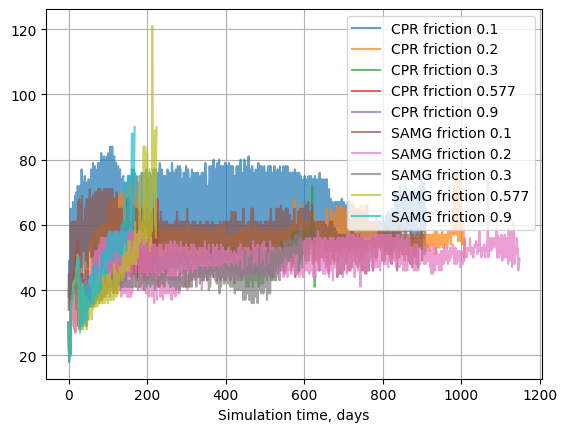

In [16]:
g = 25

data = {
    'CPR friction 0.1': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'CPR'}_friction={0.1}.json"),
    'CPR friction 0.2': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'CPR'}_friction={0.2}.json"),
    'CPR friction 0.3': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'CPR'}_friction={0.3}.json"),
    'CPR friction 0.577': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'CPR'}.json"),
    # 'CPR friction 0.577_new': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'CPR'}_friction={0.577}.json"), 
    'CPR friction 0.9': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'CPR'}_friction={0.9}.json"),
    'SAMG friction 0.1': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'SAMG'}_friction={0.1}.json"),
    'SAMG friction 0.2': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'SAMG'}_friction={0.2}.json"),
    'SAMG friction 0.3': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'SAMG'}_friction={0.3}.json"),
    'SAMG friction 0.577': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'SAMG'}.json"),
    # 'SAMG friction 0.577_new': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'SAMG'}_friction={0.577}.json"), 
    'SAMG friction 0.9': load_data(f"../stats/stats_thermal_geo4h_steadyx{g}_sol{'SAMG'}_friction={0.9}.json"),
}

DAY = 24 * 60 * 60


for name, d in data.items():
    d_ts = np.array(get_time_steps(d))
    ts = np.cumsum(get_time_steps(d))
    ls = get_ls_indices(d)
    ns = get_newton_iterations(d)

    st, sl, op = get_num_sticking_sliding_open(d)
    total_frac = st + sl + op
    # plt.plot(ts[ls] / DAY, sl / total_frac, label=name + ' slide', alpha=0.6)
    # plt.ylabel('Share of sliding cells')
    
    # plt.plot(ns, label=name, alpha=0.7)
    # plt.plot(d_ts / DAY, label=name, alpha=0.4)
    # plt.plot(ts / DAY, label=name, alpha=0.7)
    # plt.yscale('log')

    plt.plot(get_gmres_iterations(d), label=name, alpha=0.7)
    # plt.ylabel('GMRES iters')
    # plt.plot(ts[ls] / DAY, get_gmres_iterations(d), label=name, alpha=0.7)
    # plt.xscale('log')

    # fourier = get_fourier_max(d)
    # plt.plot(ts[ls] / DAY, fourier, label=name, alpha=0.7)
    # plt.yscale('log')

    # enthalpy = get_enthalpy_max(d)
    # plt.plot(ts[ls] / DAY, enthalpy, label='Convection', alpha=0.7)
    # plt.yscale('log')
    # plt.ylim(bottom=1e-5, top=1e-2)


plt.grid()
plt.xlabel('Simulation time, days')
plt.legend()

In [17]:
import pandas as pd
from collections import defaultdict

table = defaultdict(dict)
NDIGITS = 1

for name, d in data.items():
    solver, _, friction = name.split(' ')
    st, sl, op = get_num_sticking_sliding_open(d)
    total_frac = st + sl + op
    table[friction][r'Sliding, \%'] = str(int(np.max(sl / total_frac) * 100))
    table[friction][solver] = str(round(np.mean(get_gmres_iterations(d)), NDIGITS))


table = pd.DataFrame(table)
# table.rename(columns=table.loc['Total DoFs'], inplace=True)
# table.drop('Total DoFs', axis=0, inplace=True)
table.columns.name = 'Friction'
table

Friction,0.1,0.2,0.3,0.577,0.9
"Sliding, \%",96,54,24,9,4
CPR,66.8,55.1,47.5,43.5,46.0
SAMG,56.6,50.2,43.3,46.5,47.9


In [18]:
print(table.to_latex())

\begin{tabular}{llllll}
\toprule
Friction & 0.1 & 0.2 & 0.3 & 0.577 & 0.9 \\
\midrule
Sliding, \% & 96 & 54 & 24 & 9 & 4 \\
CPR & 66.8 & 55.1 & 47.5 & 43.5 & 46.0 \\
SAMG & 56.6 & 50.2 & 43.3 & 46.5 & 47.9 \\
\bottomrule
\end{tabular}

